In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
# plt.style.use("fivethirtyeight")


9# ***Creating the dataframe***

In [ ]:
df=pd.read_csv('/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df=df.dropna()

<Axes: >

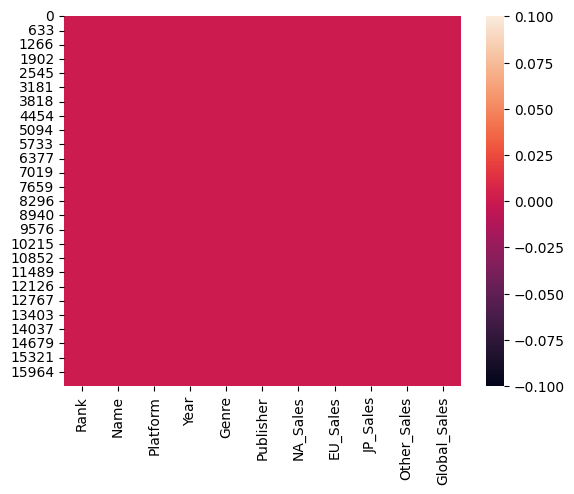

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
genre=df.groupby('Genre')['Rank'].count().sort_values(ascending=False).head(11)

In [ ]:
genre.index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy'],
      dtype='object', name='Genre')

([<matplotlib.patches.Wedge at 0x79e2e0c246d0>,
 [Text(0.8759179310694545, 0.6654079786349173, 'Action'),
  Text(-0.2066030537457028, 1.0804236105264224, 'Sports'),
  Text(-0.9173778249796893, 0.6069744032787006, 'Misc'),
  Text(-1.0988282146114616, -0.0507597751550148, 'Role-Playing'),
  Text(-0.9102813557253915, -0.6175660721078704, 'Shooter'),
  Text(-0.4921980257533126, -0.9837383307793499, 'Adventure'),
  Text(0.03900939116031606, -1.0993080857527164, 'Racing'),
  Text(0.48352931463986026, -0.988028036992831, 'Platform'),
  Text(0.7886597037700166, -0.7668219295569147, 'Simulation'),
  Text(0.9976316008908325, -0.4633909676547384, 'Fighting'),
  Text(1.090155287982835, -0.14683816970754757, 'Strategy')])

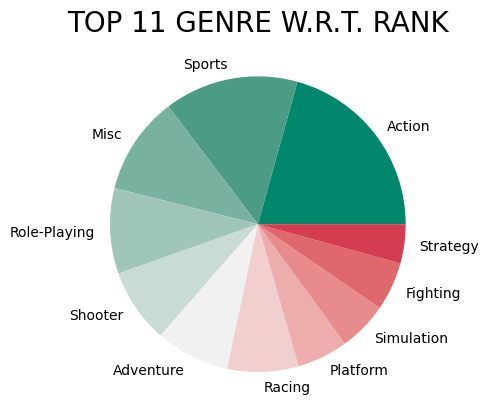

In [ ]:
from IPython.core.pylabtools import figsize
colors=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1f1f1','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51']
plt.title('TOP 11 GENRE W.R.T. RANK',fontsize=20)
plt.pie(genre,labels=genre.index,colors=colors)

In [ ]:
genre=df.groupby('Global_Sales')['Name'].count().sort_values(ascending=False).head(10)

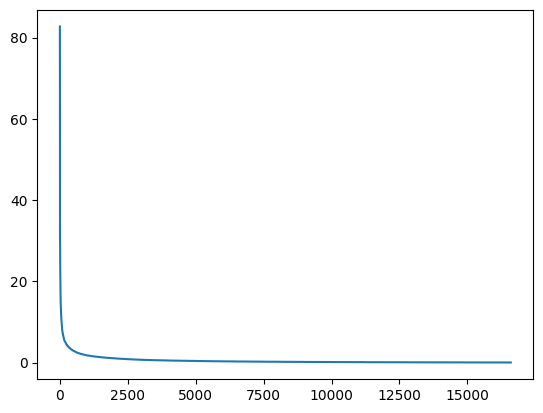

In [ ]:
plt.plot(df['Global_Sales'])

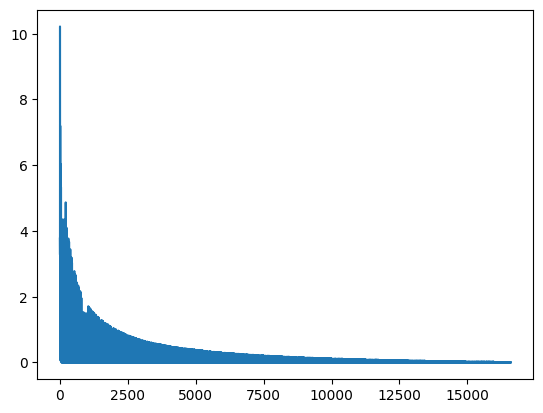

In [ ]:
plt.plot(df['JP_Sales'])

<Axes: xlabel='EU_Sales', ylabel='JP_Sales'>

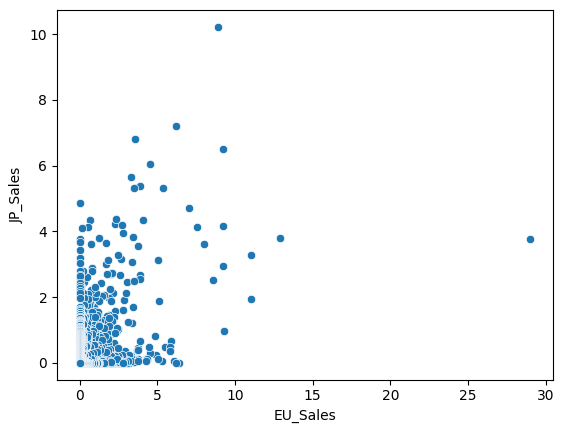

In [ ]:
sns.scatterplot(x=df['EU_Sales'],y=df['JP_Sales'])

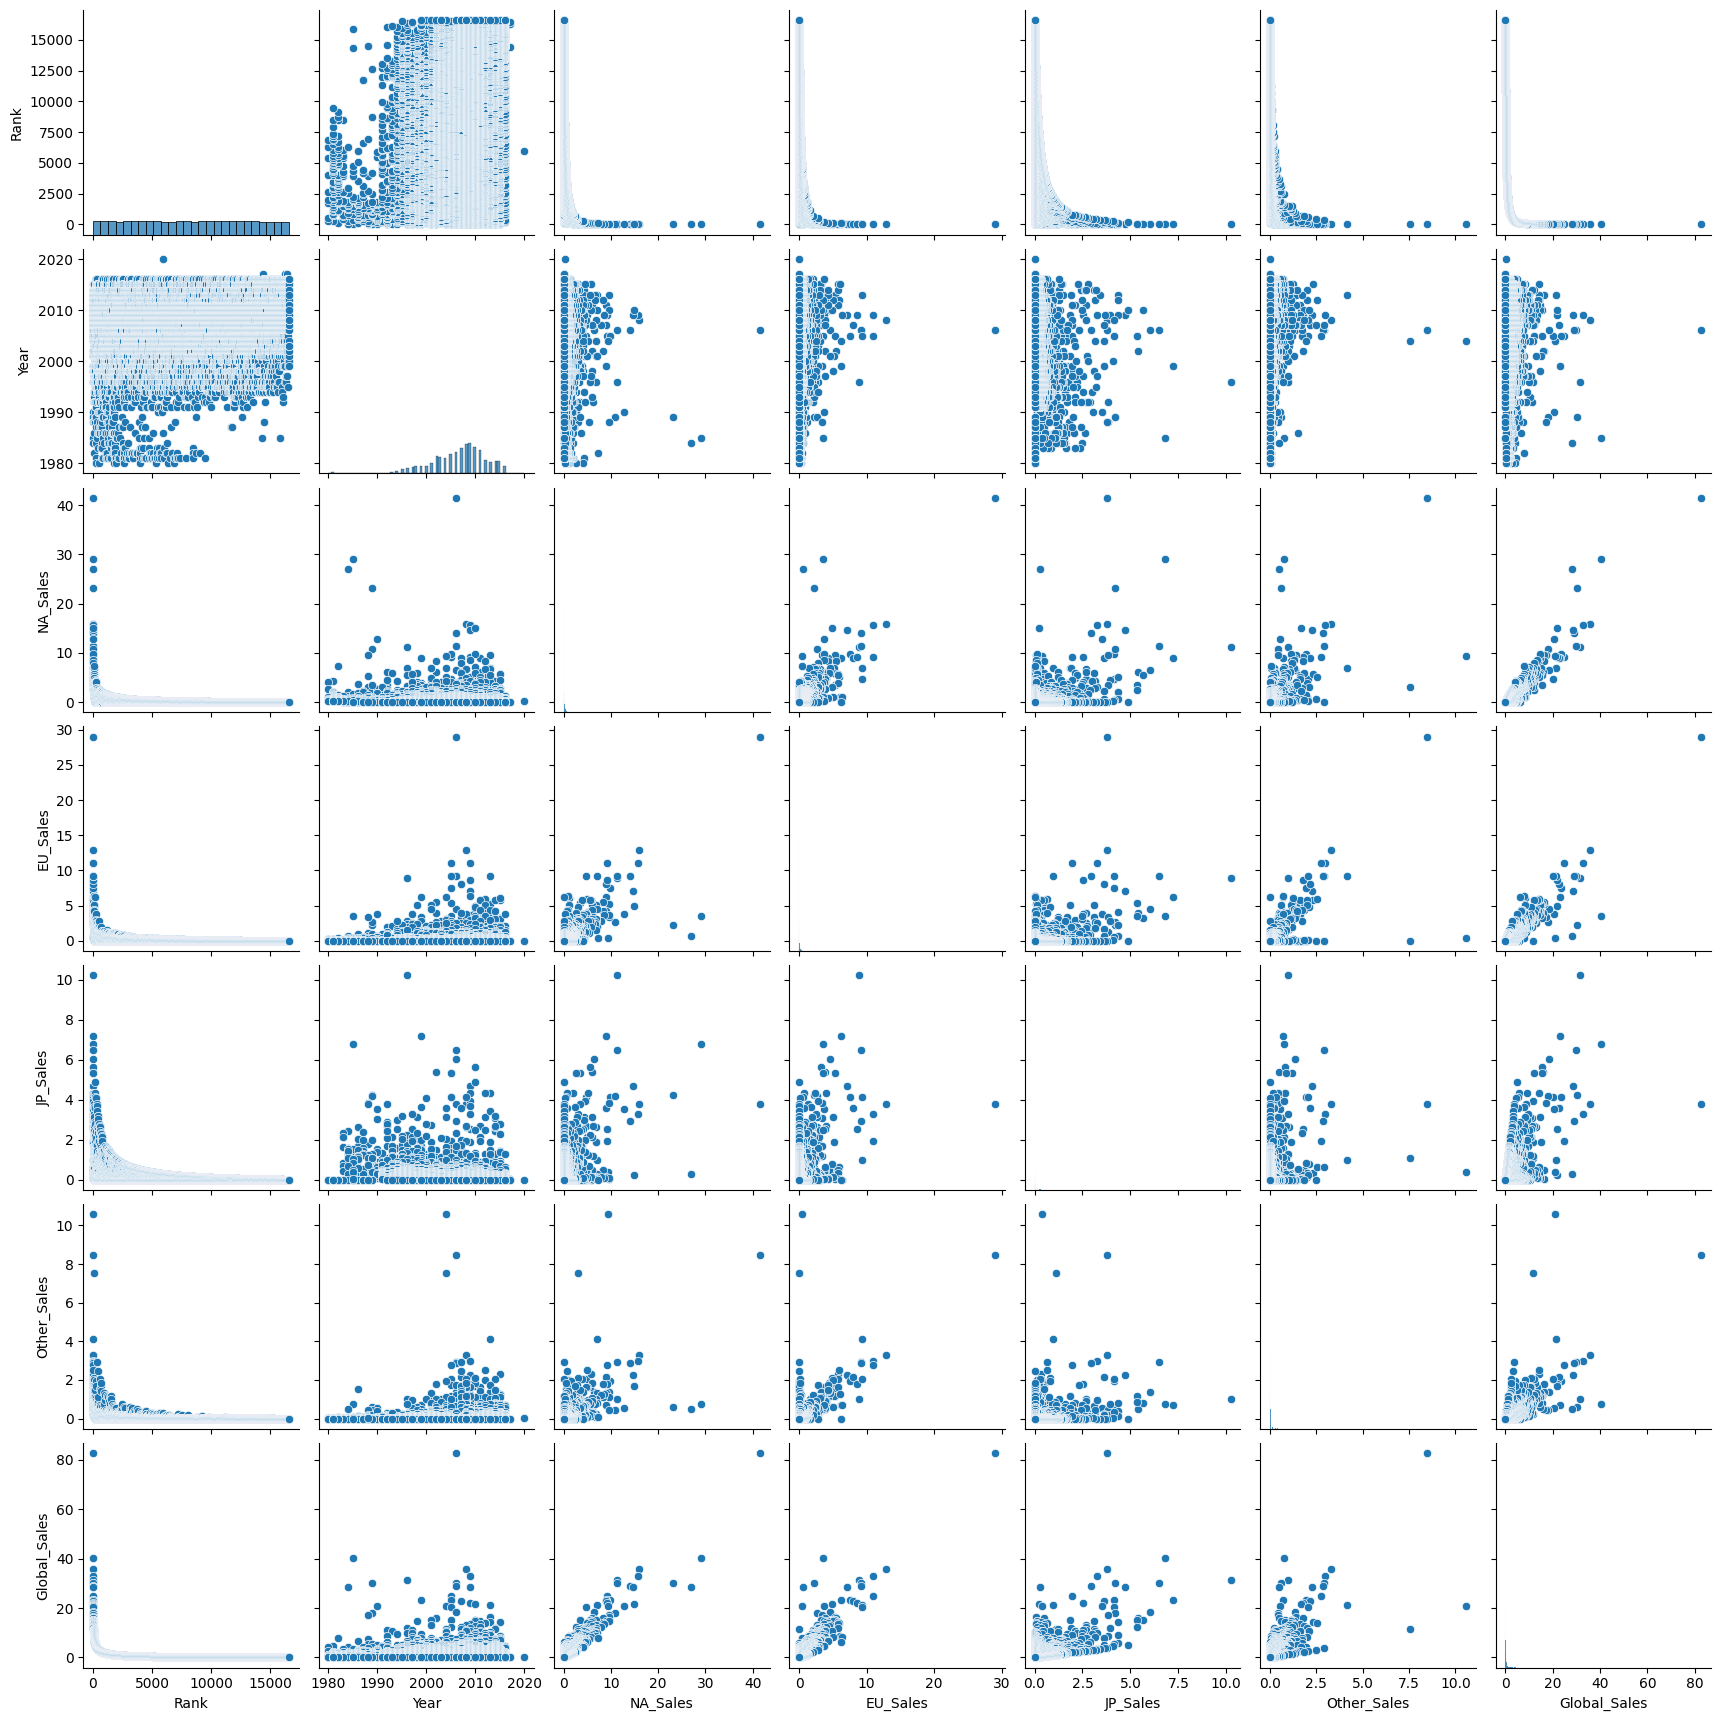

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns


Index(['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [ ]:
df=pd.read_csv('/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.drop(columns=['Name', 'Platform', 'Year', 'Genre', 'Publisher'],axis=1,inplace=True)

In [ ]:
df.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
final_data=pd.DataFrame(df_scaled,columns=df.columns)

In [ ]:
final_data.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-1.732076,50.480508,57.136930,11.938058,44.606085,52.864025
1,-1.731867,35.284437,6.794188,21.767296,3.828224,25.532503
2,-1.731659,19.084273,25.197785,12.002724,17.297115,22.690025
3,-1.731450,18.961823,21.497277,10.353740,15.441165,20.876498
4,-1.731241,13.476053,17.302048,32.792857,5.047848,19.828254


In [ ]:
X=final_data[['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y=final_data['Global_Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE: ',mean_squared_error(y_test,pred))



MSE:  1.1278266017764592e-05


Text(0, 0.5, 'predicted')

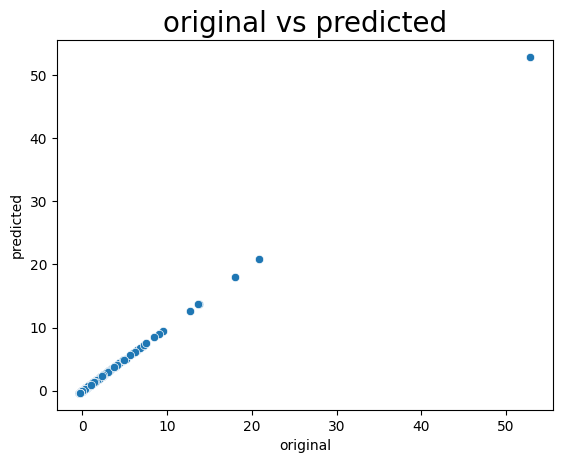

In [ ]:
sns.scatterplot(x=y_test,y=pred)
plt.title('original vs predicted',fontsize=20)
plt.xlabel('original')
plt.ylabel('predicted')